In [4]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt


# File to Load
file_to_load = "output_data/cleaned_avo.csv"

# Read Avocado File and store into Pandas data frame
avocado_data = pd.read_csv(file_to_load)

# Preview of the DataFrame
avocado_data.head()

,Unnamed: 0,Date,Average Price,Total Volume,Hass Small,Hass Large,Hass XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Region,Total Sales
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,85434.70
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,74083.92
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,109944.80
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,85311.52
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,65330.69


In [47]:
#count avocados by type (conventional vs organic)
group = avocado_data.groupby("Type")
total = group["Total Volume"].sum()


print(total)

Type
conventional    9.385999e+09
organic         2.726631e+08
Name: Total Volume, dtype: float64


Text(0.5, 1.0, 'Type of Avocado Sales from 2015 - 2018')

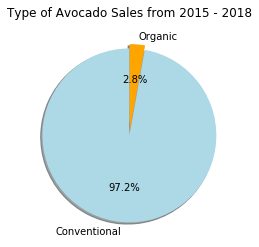

In [28]:
#Create PieChart
labels = ["Conventional", "Organic"]
counts = [9.385999e+09, 2.726631e+08]

avocado_type_df = pd.DataFrame({
    "counts": counts,
    "labels": labels
})

fig, ax = plt.subplots()

avocado_type_df.plot.pie(y= "counts", explode = (0.05, 0), labels = labels, colors = ["lightblue", "orange"], autopct="%1.1f%%", shadow=True, startangle = 90, legend = False, ax=ax)


ax.set_ylabel("")
ax.set_title("Type of Avocado Sales from 2015 - 2018")



In [39]:
#Group data by year
group_by_year = avocado_data.groupby(["Type","Year"])
total_by_year = group_by_year["Total Volume"].sum()/1000000
total_by_year



Type          Year
conventional  2015    2672.913320
              2016    2919.990424
              2017    2964.395912
              2018     828.699669
organic       2015      55.300121
              2016      81.740325
              2017     105.216224
              2018      30.406417
Name: Total Volume, dtype: float64

In [41]:
#Create DataFrame
type_year_bar = pd.DataFrame({
    "Year Totals": total_by_year
    })
type_year_bar.head(10)

Year Totals
Type         Year             
conventional 2015  2672.913320
             2016  2919.990424
             2017  2964.395912
             2018   828.699669
organic      2015    55.300121
             2016    81.740325
             2017   105.216224
             2018    30.406417

Text(0, 0.5, 'Units Sold (in millions)')

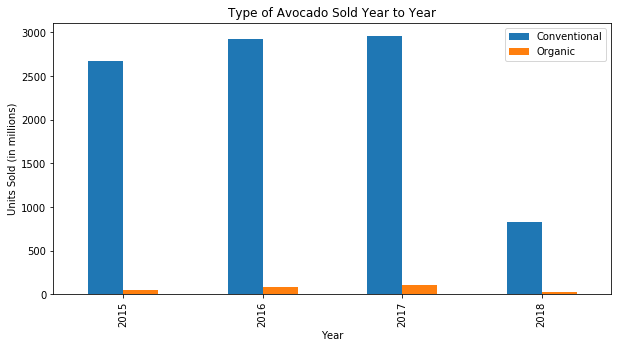

In [46]:
#Create BarChart

conventional = [2672.913320, 2919.990424, 2964.395912, 828.699669]
organic = [55.300121, 81.740325, 105.216224, 30.406417]
index = [2015, 2016, 2017, 2018]

df_multiplot = pd.DataFrame({
    "Conventional": conventional,
    "Organic": organic}, index = index)

multi_plot = df_multiplot.plot(kind = "bar", figsize=(10,5))

plt.title("Type of Avocado Sold Year to Year")
plt.xlabel("Year")
plt.ylabel("Units Sold (in millions)")

